# Question1: Expectation values when measuring the energy on an arbitrary wave function.

## import packages

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## load functions: Consider the unnormalized wave function Ψ(x) = Nx^2 (L − x) , for L=2,

In [2]:
def integral(f,a,b,steps):
    # f=integral function of x
    # a lower limit 
    # b upper limit  
    # steps:(steps-1) trapezoids
    L=b-a
    interval=L/(steps-1)
    cumulator=0
    for x in range(steps-1):
        f1 = f(x*interval)
        f2 = f((x+1)*interval)
        cumulator += 0.5 * (f1+f2) * interval
    return cumulator

def phi(n,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

### (a) Normalize the function Psi(x)

In [3]:
m=2 # power              
L=2 # length of box. 
N=1 # normalize factor. ###############These parameters are changable
def Psi_sq(x):# This wavefunciton is real, so simply square the Psi
    return N*x**m*(L-x)*N*x**m*(L-x)
 # 3rd, call integral function with upper and lower limit,steps.
a = integral(Psi_sq,0,L,100)
print('The normalize factor of Psi(x) is '+ str(1/np.sqrt(a)))

The normalize factor of Psi(x) is 0.9057110631357514


In [4]:
N=0.9057110631357514
def Psi(x):
    return N*x**m*(L-x)

### (b) Plot the normalized wave function Psi(x)

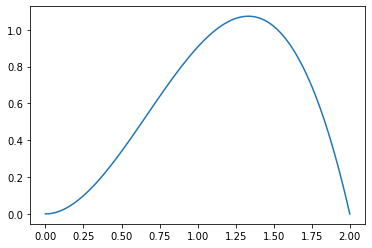

In [5]:
start_point=0
end_point=L
step=101
interval=(end_point-start_point)/(step-1)
Lx=[]
Ly=[]
for x in range(step):
    height=Psi(x*interval+start_point)
    Lx.append(float(x*interval+start_point))
    Ly.append(float(height))
plt.plot(Lx,Ly)       #Q1b作图

### (c) Calculate the expectation value

#### →Evaluate integral from 0 to L(Psi(x)(-d^2 Psi/dx^2)dx)

In [6]:
# use the integral function: 
  #firstly, define the parameters 
N=0.9057339014391647 
L=2
steps=1000
  #secondly，define the function
def qc_function(x):
    return N*x**m*(L-x)* (6*N*x-2*N*L)
expe=integral(qc_function,0,L,steps)
print('The expectation value is '+ str(expe) )

The expectation value is 3.500167872958998


### (d) For linear combination of eigenstates

In [7]:
 # find list of c_n
def c_n(x):
    return phi(n,x)*Psi(x)

 # determin c_n and store in a list Lc_n
Lc_n=[]
M=50  ######## how many Cn is used. You can change this parameter later
for n in range(M):
    Lc_n.append(integral(c_n,0,L,100))
print('The list of c_n is \n'+ str(Lc_n[1:]) )

The list of c_n is 
[0.9347618555567296, -0.35053567361005294, 0.034620797754156184, -0.04381691470902418, 0.00747807508875609, -0.012982732307289175, 0.0027252254792604247, -0.005477024994678499, 0.0012822164307108872, -0.0028041661398097864, 0.0007022565523983804, -0.0016227066175868478, 0.0004254198993581687, -0.001021801456000683, 0.0002769061554065477, -0.0006844465232454819, 0.00019019422991266603, -0.0004806256832420475, 0.00013620527936787874, -0.0003502909851924648, 0.00010084937154737037, -0.0002630916401213963, 7.673284672200879e-05, -0.00020255843861445035, 5.972092050382104e-05, -0.00015922665678722264, 4.7377724214582974e-05, -0.00012739280304498765, 3.820460008602516e-05, -0.00010348013492200107, 3.124498561562269e-05, -8.51680590031994e-05, 2.586876227316621e-05, -7.090613662013505e-05, 2.1649332213491738e-05, -5.963163177297008e-05, 1.8290872583526718e-05, -5.0599505945813803e-05, 1.5583851550743984e-05, -4.3276902582887306e-05, 1.3377029980059306e-05, -3.7275854404159

array([8.73779727e-01, 1.22875258e-01, 1.19859964e-03, 1.91992201e-03,
       5.59216070e-05, 1.68551338e-04, 7.42685391e-06, 2.99978028e-05,
       1.64407898e-06, 7.86334774e-06, 4.93164265e-07, 2.63317677e-06,
       1.80982091e-07, 1.04407822e-06, 7.66770189e-08, 4.68467043e-07,
       3.61738451e-08, 2.31001047e-07, 1.85518781e-08, 1.22703774e-07,
       1.01705957e-08, 6.92172111e-08, 5.88792977e-09, 4.10299211e-08,
       3.56658835e-09, 2.53531282e-08, 2.24464875e-09, 1.62289263e-08,
       1.45959147e-09, 1.07081383e-08, 9.76249126e-10, 7.25359827e-09,
       6.69192862e-10, 5.02768021e-09, 4.68693585e-10, 3.55593151e-09,
       3.34556020e-10, 2.56031000e-09, 2.42856429e-10, 1.87289030e-09,
       1.78944931e-10, 1.38948932e-09, 1.33619311e-10, 1.04389189e-09,
       1.00965310e-10, 7.93087272e-10, 7.71022142e-11, 6.08579973e-10,
       5.94351971e-11])

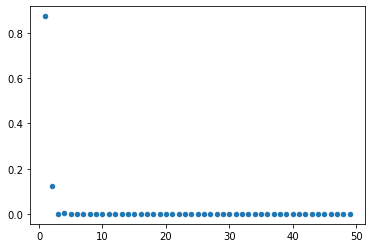

In [8]:
L_prob=np.zeros(len(Lc_n))
L_x=list(range(M))[1:]
for i in range(len(Lc_n)):
    L_prob[i] = Lc_n[i]*Lc_n[i] # probability is cn^2
 # plot the list of probability
plt.scatter(L_x, L_prob[1:],s=20)
L_prob[1:]

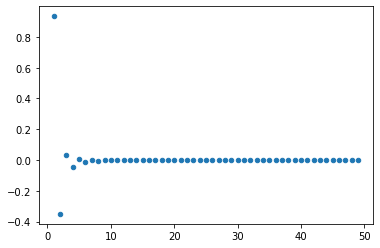

In [9]:
plt.scatter(L_x, Lc_n[1:],s=20)

### (e) Plots

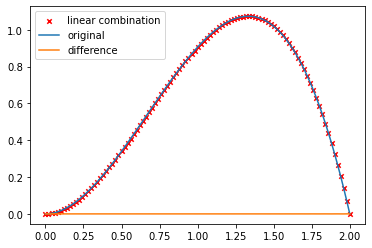

In [10]:
# plot linear combinations of c_n ( You can see it has similar shape with Psi(x) )
A=np.zeros([M,step])
for n in range(M):
    for x in range(step):
        A[n][x] = phi(n,x*interval)
lin_comb=np.dot(Lc_n,A) 
plt.figure()
plt.scatter(Lx,lin_comb,label='linear combination',marker = 'x',color='r',s=20)
plt.plot(Lx,Ly,label='original')
plt.plot(Lx,Ly-lin_comb,label='difference')
plt.legend()

In [15]:
##对f(x)作图
def plotf(f,a,b,steps):
    startpoint=a
    endpoint=b
    seg=b-a
    interval=seg/steps
    Lx=[]
    Ly=[]
    for x in range(steps):
        height=f(x*interval+startpoint)
        Lx.append(x*interval+startpoint)
        Ly.append(height)
    plt.plot(Lx,Ly,label=str(f))

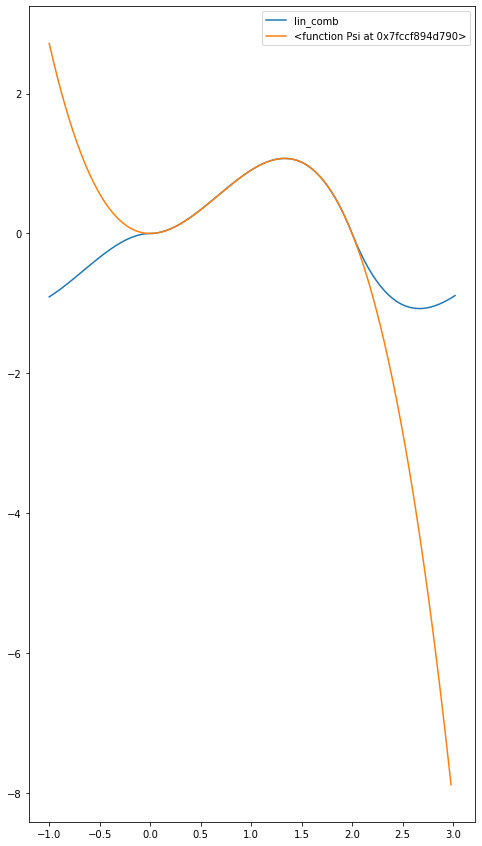

In [16]:
# outside the box
B=np.zeros([M,2*step])
for n in range(M):
    for x in range(2*step):
        B[n][x] = phi(n,x*interval-0.5*L)
lin_comb=np.dot(Lc_n,B) 
x_variable=[]
y_variable=[]
for i in range (2*step):
    x_variable.append(i*interval-0.5*L)
    y_variable.append(Psi(x*interval-0.5*L))
plt.figure(figsize=(8,15))
plt.plot(x_variable,lin_comb,label="lin_comb")
plotf(Psi,-0.5*L,1.5*L,200)
plt.legend()

### (f) The average value of the kinetic energy (sum over PnEn)

In [13]:
E_n=np.zeros(M)
for i in range(M):
    E_n[i] = i*i*(np.pi**2)/(L*L)
ke = np.dot(E_n,L_prob)
a=expe-ke
print('The average value of the kinetic energy is '+ str(ke)+", when M="+str(M) +
      "\nThe exact kinetic energy is " + str(expe) +
     '\nThe difference is '+ str(round(a,5))+ ', the relative error is '+ str(round(a/expe*100,5))+'%')


The average value of the kinetic energy is 3.500141616342402, when M=50
The exact kinetic energy is 3.500167872958998
The difference is 3e-05, the relative error is 0.00075%
